In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
def load_pic(path):
    
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

# Part 1

In [3]:
print('Part 1')
#Read image
path1 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P5/internet_censorship_map.png'
pic1 = load_pic(path1)
#plt.imshow(pic1)

Part 1


In [4]:
colors = [[0,0,0],[255,153,221],[255,221,221],[255,255,221],[152,251,152],[224,224,224]]

In [5]:
#counting number of pixels with a specific color
count = np.zeros(len(colors))
for pix in pic1.reshape(-1,3):
    for i in range(len(colors)):
        if all(pix==colors[i]):
            count[i]+=1

In [6]:
#number of pixels
allpix = pic1.shape[0]*pic1.shape[1]
#figuring out the amount of pixels for the water
count = np.append(count,allpix-sum(count))

In [7]:
water = count[6]/(allpix-count[0])
pervasive = count[1]/(sum(count)-count[6]-count[0])
sellitno = (count[3]+count[4])/(sum(count)-count[6]-count[0])
print('Water Percentage: ', water*100, '%')
print('Pervasive Percentage: ', pervasive*100, '%')
print('Selective, Little or no Percentage: ', sellitno*100, '%')

Water Percentage:  74.67604178589215 %
Pervasive Percentage:  11.444591029023748 %
Selective, Little or no Percentage:  52.06928564448353 %


# Part 2

In [8]:
print('Part 2')
#Read image
path2 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P5/provinces_of_iran_by_population.png'
pic2 = load_pic(path2)
#plt.imshow(pic2)

Part 2


In [9]:
topcolors = np.array([[0,0,0],pic2[695,75], pic2[660,75], pic2[630,75], pic2[595,75],pic2[565,75], pic2[535,75]])

In [10]:
#Thresholding
pic = pic2.reshape(pic2.shape[0]*pic2.shape[1],3)
from sklearn.metrics.pairwise import euclidean_distances
pic = topcolors[np.argmin(euclidean_distances(pic, topcolors),axis=1)]

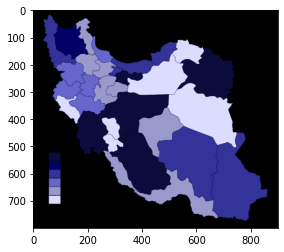

In [11]:
plt.imshow(pic.reshape(pic2.shape[0],pic2.shape[1],3))
plt.show()

In [12]:
#creating cells and counting the number of pixels that have a specific color in each cell
#later I can just add up numbers
pic = pic.reshape(pic2.shape[0],pic2.shape[1],3)
cells = []

height,width = pic.shape[0]//8, pic.shape[1]//9
for j in range(8):
    h1 = j*height
    h2 = (j+1)*height
    row = []
    
    for i in range(9):
        w1 = i*width
        w2 = (i+1)*width

        cellcount = np.zeros(topcolors.shape[0]-1)
        for pix in pic[h1:h2,w1:w2].reshape(-1,3):
            for c in range(1,topcolors.shape[0]):
                if all(pix==topcolors[c]):
                    cellcount[c-1]+=1
        
        row.append(cellcount)
    cells.append(row)
cells = np.array(cells)

In [13]:
#counting number of pixels with a specific color else than black
count = np.sum(cells.reshape(-1,6), axis=0)

In [14]:
print('Over 4 M: ', (count[-1]/np.sum(count))*100, '%')
print('Over 2 M: ', (np.sum(count[2:])/np.sum(count))*100, '%')

Over 4 M:  27.464926646099002 %
Over 2 M:  64.6998719960946 %


In [15]:
#Khorasan Shomali, Khorasan Jonoubi
east = np.sum(cells[:,5:].reshape(-1,6), axis=0)[0] - np.sum(cells[2,5:].reshape(-1,6), axis=0)[0]
print('Less than 1 M East: ', (east/np.sum(count))*100, '%')

Less than 1 M East:  10.985346249144985 %


In [16]:
north = np.sum(cells[:1,:].reshape(-1,6), axis=0)
north_p = north/np.sum(north)
population_list = [1, 1.5, 2, 3, 4, 5]
north_pop = np.sum(north_p*population_list)
print('North: ' ,int(north_pop*(10**5)))

North:  301054


In [17]:
#khouzestan
s1 = np.zeros(6)
s1[-1] = np.sum(cells[4:,:2].reshape(-1,6), axis=0)[-1]
#Boushehr, Hormozgan
s2 = np.zeros(6)
s2[0] = np.sum(cells[5:,:6].reshape(-1,6), axis=0)[0]
#Sisitan o Balouchestan
s3 = np.zeros(6)
s3[3] = np.sum(cells[5:,7:].reshape(-1,6), axis=0)[3]
south = s1 + s2 + s3
south_p = south/np.sum(south)
population_list = [1, 1.5, 2, 3, 4, 5]
south_pop = np.sum(south_p*population_list)
print('South: ' ,int(south_pop*(10**5)))

South:  321348


# Part 3

In [18]:
print('Part 3')
#Read image
path3 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P5/iran_population-urban_vs_rural.png'
pic3 = load_pic(path3)
#plt.imshow(pic3)

Part 3


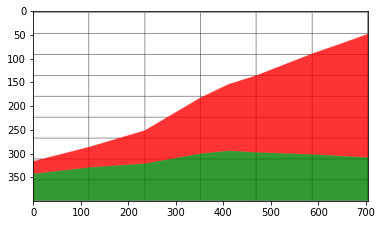

In [19]:
#cropping the picture
croppic3 = pic3[57:457,135:840]
plt.imshow(croppic3)
plt.show()

In [20]:
colours, counts = np.unique(croppic3.reshape(croppic3.shape[0]*croppic3.shape[1],3), axis=0, return_counts=1)
topcolors = colours[np.argsort(-counts)[:3]]

In [21]:
print('Frequent Colors:\n', topcolors)

Frequent Colors:
 [[255 255 255]
 [255  51  51]
 [ 51 153  51]]


In [22]:
#creating cells and counting the number of pixels that have a specific color in each cell
#later I can just add up numbers
cells = []

height,width = croppic3.shape[0]//9, croppic3.shape[1]//6
for j in range(9):
    h1 = j*height
    h2 = (j+1)*height
    row = []
    
    for i in range(6):
        w1 = i*width
        w2 = (i+1)*width
        
        cellcount = np.zeros(3)
        for pix in croppic3[h1:h2,w1:w2].reshape(-1,3):
            for c in range(topcolors.shape[0]):
                if all(pix==topcolors[c]):
                    cellcount[c]+=1
        
        row.append(cellcount)
    cells.append(row)
cells = np.array(cells)

In [23]:
#counting number of pixels with a specific color
count = np.sum(cells.reshape(-1,3), axis=0)

urban = count[1]/np.sum(count[1:])
print('Urban in the given period: ', urban)

Urban in the given period:  0.595856026016999


In [24]:
count9606 = np.sum(cells[:,4], axis=0)
rural9606 = count9606[2]/np.sum(count9606[1:])
print('Rural between 1996 to 2006: ', rural9606*100, '%')

Rural between 1996 to 2006:  34.135955161724645 %


In [25]:
count7686 = np.sum(cells[:,2], axis=0)
urban7686 = count7686[1]/np.sum(count7686)
print('Urban between 1976 to 1986: ', int(urban7686*90))

Urban between 1976 to 1986:  21


In [26]:
urban_to_all = np.zeros(cells.shape[1])
for i in range(cells.shape[1]):
    urban_to_all[i] = np.sum(cells[:,i], axis=0)[1]/np.sum(np.sum(cells[:,i], axis=0)[1:])

print('Urban Percentage in each Decade: ', urban_to_all*100, '%')

Urban Percentage in each Decade:  [36.02975798 43.77448237 52.09616531 58.27743394 65.86404484 72.1110026 ] %


# Part 4

In [27]:
print('Part 4')
#Read image
path4 = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW1/inputs/P5/iran_population_pyramid.png'
pic4 = load_pic(path4)
#plt.imshow(pic4)

Part 4


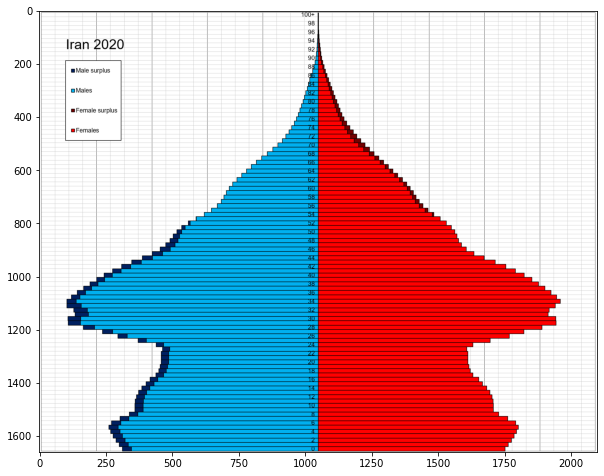

In [28]:
#cropping the picture
fig = plt.figure(figsize=(10,10))
croppic4 = pic4[30:1690,55:-57]
plt.imshow(croppic4)
plt.show()

In [29]:
colours, counts = np.unique(croppic4.reshape(croppic4.shape[0]*croppic4.shape[1],3), axis=0, return_counts=1)
topcolors = colours[np.argsort(-counts)[1:3]]

In [30]:
print('Frequent Colors:\n', topcolors)

Frequent Colors:
 [[255   0   0]
 [  0 176 240]]


In [31]:
#creating rows and counting the number of pixels that have a specific color in each row
#later I can just add up numbers
rows = []

height = croppic4.shape[0]//101
for j in range(101):
    h1 = j*height
    h2 = (j+1)*height
    count = np.zeros(topcolors.shape[0])
    for pix in croppic4[h1:h2,:].reshape(-1,3):
        for c in range(topcolors.shape[0]):
            if all(pix==topcolors[c]):
                count[c]+=1
        
    rows.append(count)

In [32]:
population_pixels = (croppic4.shape[0]*croppic4.shape[1])/2

In [33]:
menwomen = np.sum(rows, axis=0)
menwomen_population = (menwomen/population_pixels)*(10**6)
print('Number of Women: ', int(menwomen_population[0]))
print('Number of Men: ', int(menwomen_population[1]))

Number of Women:  338500
Number of Men:  334525


In [34]:
over50 = np.sum(rows[:49])/np.sum(rows)
print('Over 50 Percentage: ', over50*100, '%')

Over 50 Percentage:  15.292766758390702 %


In [35]:
under20 = np.sum(rows[80:], axis=0)
under20_population = (under20/population_pixels)*(10**6)
print('Number of Women Under 20: ', int(under20_population[0]))
print('Number of Men Under 20: ', int(under20_population[1]))

Number of Women Under 20:  108872
Number of Men Under 20:  108068


In [36]:
men40 = np.sum(rows[50:60], axis=0)[1]
men40_population = (men40/population_pixels)*(10**6)
print('Number of Men in their 40s: ', int(men40_population))

Number of Men in their 40s:  44256
